## **Airline Customers Segmenting with K-means Clustering**

## **Introduction**

In this project, we are going to analyze customer value using LRFMC model from avation dataset; Airline Customer Segmentation data. We are going to segmented the customer from low customer value to high customer value using `KMeans` model.

The data contains several information as follows:

<center>
    
| Columns  | Description |
|----------|-------------|
| `MEMBER_NO` | Membership card number (ID) |
| `FFP_DATE` | Membership join date |
| `FIRST_FLIGHT_DATE` | First flight date |
| `GENDER` | Gender |
| `FFP_TIER` | Membership card level|
| `WORK_CITY` | The city where the customer works |
| `WORK_PROVINCE` | The province where the customer works |
| `WORK_COUNTRY` | The country where the customer works |
| `AGE` | Age |
| `LOAD_TIME` | The end time of the observation window |
| `FLIGHT_COUNT` | Number of flights in the observation window |
| `SUM_YR_1` | Fare revenue |
| `SUM_YR_2` | Votes prices |
| `SEG_KM_SUM` | Total flight kilometers in the observation window |
| `LAST_FLIGHT_DATE` | Last flight date |
| `LAST_TO_END` | The time from the last flight to the end of the observation window |
| `AVG_INTERVAL` | Average flight time interval |
| `MAX_INTERVAL` | Maximum flight interval |
| `avg_discount` | Average discount rate |
| `BP_SUM` | Total basic integral |
| `EXCHANGE_COUNT` | Number of points exchanged |
| `Points_Sum` | Total cumulative points |
| `Point_NotFlight` | Points not used by the customer |
    
</center>

### Notes:
- Observation window: time period of observation

### **Data Exploration**

In this section, we are going to understand the general info and properties of the dataset. Furthermore, we do univariate analysis for advanced analysis

**Outlines:**
1. Explore general properties of the dataset
2. Categorical and numerical description calculation
3. Univariate analysis

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Assignment 26 dan 28/Assignment 29/data/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


Observations:
1. All data types (dtypes) seem **appropriate**, given the corresponding column name.
2. We can see a lot of missing values that need to be handling.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Observations:
- There are 23 attributes about the dataset, they contain basic customer information, flight information, and integration information.
- Total data are 62988 entries. However, we found there are some attributes which have missing values, such as WORK_PROVINCE that shows 59740 entries.
- There are two type of data here: numeric showed by `int64` and `float64` types, and category showed by `object` type.

### **Statistical Summary**

In [ ]:
# get the columns of numeric and category
numeric_cols = df.select_dtypes(['float64', 'int64']).columns.tolist()
category_cols = df.select_dtypes('object').columns.tolist()

In [ ]:
# category properties
df[category_cols].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


Observations:
1.  `GENDER` has two values: `Male` and `Female`, with `Male` being the most common (48134).
2. `LOAD_TIME` just have only one unique, it's 3/31/2014.
3. The information in `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LAST_FLIGHT_DATE`, `WORK_CITY`, and `WORK_PROVINCE` seems fine.

In [ ]:
# numeric properties
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


Observations:
1. All `MEMBER_NO` values are unique.
2. `FFP_TIER `falls between 4 and 6, with an average of about 4.
3. The average `AGE` is around 42 years, ranging from 6 to 110 years old.
4. `FLIGHT_COUNT` averages about 12 flights, with a range from 2 to 213.
5. `BP_SUM` averages approximately 10,925 points, ranging from 0 to 505,308.
6. `SUM_YR_1` & `SUM_YR_2` have average points of about 5,355 and 5,604, respectively.
7. `SEG_KM_SUM` averages around 17,124 kilometers, with the shortest trip at 368 km and the longest at 580,717 km.
8. `LAST_TO_END` averages about 176 days since the last flight, ranging from 1 to 731 days.
9. `AVG_INTERVAL` &` MAX_INTERVAL` show an average time between flights of roughly 68 days, with the longest interval being about 166 days.
10. `EXCHANGE_COUNT` averages around 0.32 exchanges, with a maximum of 46.
11. The average discount (`avg_discount`) applied is about 0.72, ranging from 0 to 1.5.
12. `Points_Sum` averages approximately 12,546 points, with values ranging from 0 to 985,572.
13. `Point_NotFlight` averages about 2.73 instances of points not related to flights, with a maximum of 140.

### **Univariate Analysis**

Explores some variables in a dataset separately.
- For categorical variables, the analysis uses `countplot`. The variables under interest are `GENDER`, `FIRST_FLIGHT_DATE` in a year, and `LAST_FLIGHT_DATE`
- For numerical variables, the analysis uses `histplot` and `boxplot`. We are interested in understanding the normallity properties of the dataset using `histplot` and check how spreading the outlier in a dataset using `boxplot`

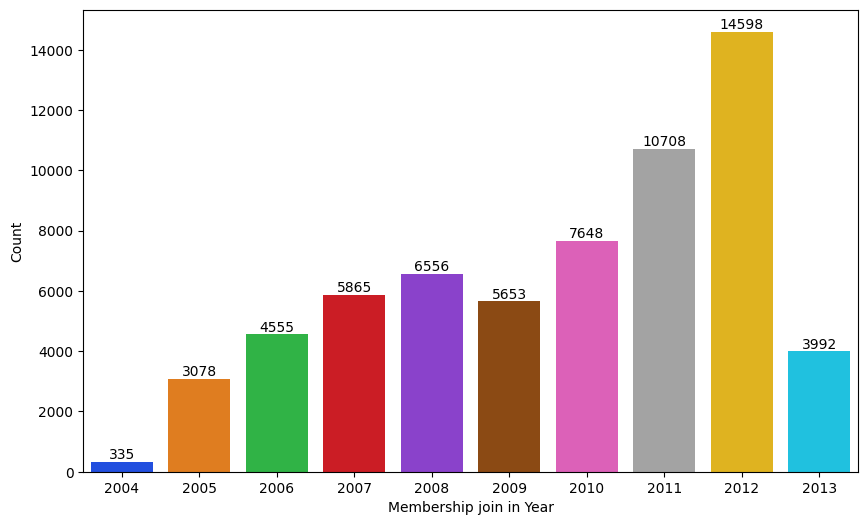

In [ ]:
# FFP in year
ffp_flight = pd.to_datetime(df['FFP_DATE']).dt.year

plt.figure(figsize=(10,6))
ax = sns.countplot(x=ffp_flight, palette='bright')

for label in ax.containers:
    ax.bar_label(label)

ax.set(xlabel='Membership join in Year', ylabel='Count')
plt.show()

Observations:
- The data seems reasonable
- The data shows an increase from 2004 to 2008, a slight decrease in 2009, followed by a significant rise until 2012, and then a decline again in 2013.
- The lowest number of passengers was in 2004, at 335 passengers, while the highest was in 2012, at 14,598 passengers.

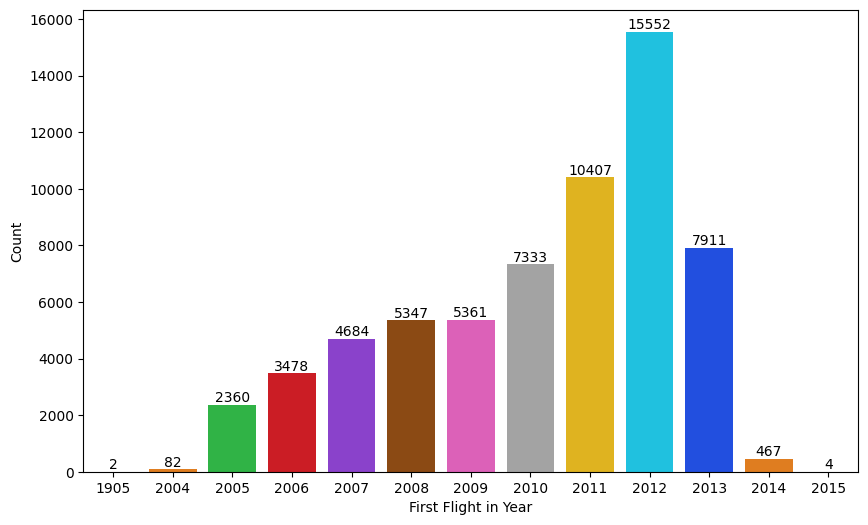

In [ ]:
# first flight in year
first_flight = pd.to_datetime(df['FIRST_FLIGHT_DATE']).dt.year

plt.figure(figsize=(10,6))
ax = sns.countplot(x=first_flight, palette='bright')

for label in ax.containers:
    ax.bar_label(label)

ax.set(xlabel='First Flight in Year', ylabel='Count')
plt.show()

Observations:
- The data shows `FIRST_FLIGHT` from 1905 to 2015. It seems, as time goes on, the number of passenger using airline increase gradually to 2012. However, after 2012 it seems decreasing.
- Most customer flight for their first time in 2012, with total 15552. And lowest number of customer firstly flight in 1905 and 2015 which are only 2 and 4 passenger respectively.
- Data from 1905 and 2015 appear to be outliers. Upon reviewing the earliest membership registrations, which began in 2004, it's clear that flights listed as departing in 1905 could not have occurred. This indicates a likely error in the data for the year 1905. Also, we can see that the observation window, or LOAD_TIME, was last updated in 2014, meaning that 2015 fell outside of this designated observation period, therefore we are going to discard those data.

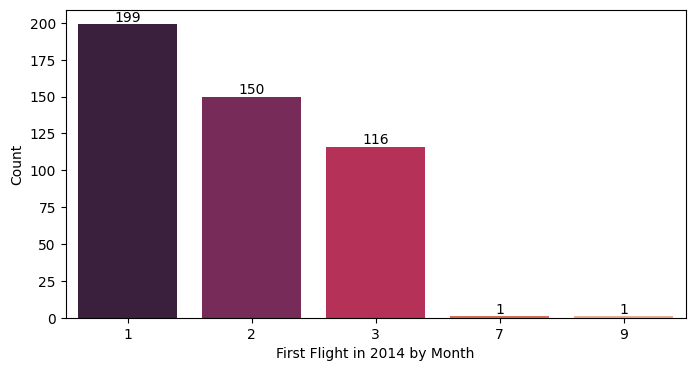

In [ ]:
# first flight in month in 2014

df_month_flight = df[df['FIRST_FLIGHT_DATE'].str.contains('2014')]
month_flight = pd.to_datetime(df_month_flight['FIRST_FLIGHT_DATE']).dt.month

plt.figure(figsize=(8,4))
ax = sns.countplot(x=month_flight, palette='rocket')

for label in ax.containers:
    ax.bar_label(label)

ax.set(xlabel='First Flight in 2014 by Month', ylabel='Count')
plt.show()

Observations:
1. To double-check if there are outliers in the data for the year 2014, we can plot the data for first flights in 2014. Upon examination, we find one data point in July (7) and one in September (9). These data points are outliers because the data load only extends until March 2014.

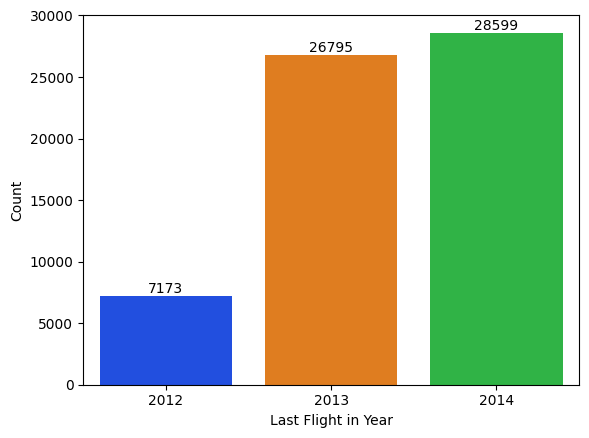

In [ ]:
#last flight in year

#drop for last flight 2014-2-29 since in that year, february is until 28
df_last = df.drop(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index)

last_flight = pd.to_datetime(df_last['LAST_FLIGHT_DATE']).dt.year
ax = sns.countplot(x=last_flight, palette='bright')

for label in ax.containers:
    ax.bar_label(label)

ax.set(xlabel='Last Flight in Year', ylabel='Count')
plt.show()

Observations:
- Most customer's last flight are in 2014 with total 28599 customers.

In [ ]:
#Gender
gender = (df.groupby('GENDER')
            .agg(num_trx=('MEMBER_NO','count'))
            .reset_index()
            .sort_values('num_trx',ascending=False)
            )
gender

,GENDER,num_trx
1,Male,48134
0,Female,14851


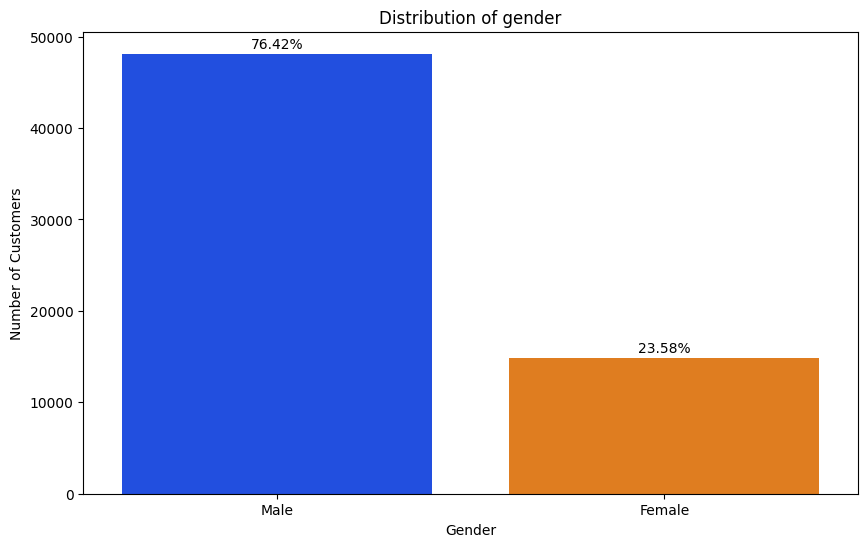

In [ ]:
# Plotting the bar chart with a reduced figure size
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=gender, x='GENDER', y='num_trx', hue='GENDER', palette='bright')

# Add percentage labels on top of the bars
total = float(len(df))
for p in bar_plot.patches:
    height = p.get_height()
    if height != 0:
        bar_plot.text(p.get_x() + p.get_width() / 2, height + total*0.01, f'{(height/total) * 100:.2f}%', ha="center")

plt.title('Distribution of gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

Observations:
- Most of the customer of the airline is a male with 76.42% of total customer. Using `value_count()`, there are 48134 male as a airline customer.
- Whereas, female customer only 23.6% of total customer or in total 14851 female

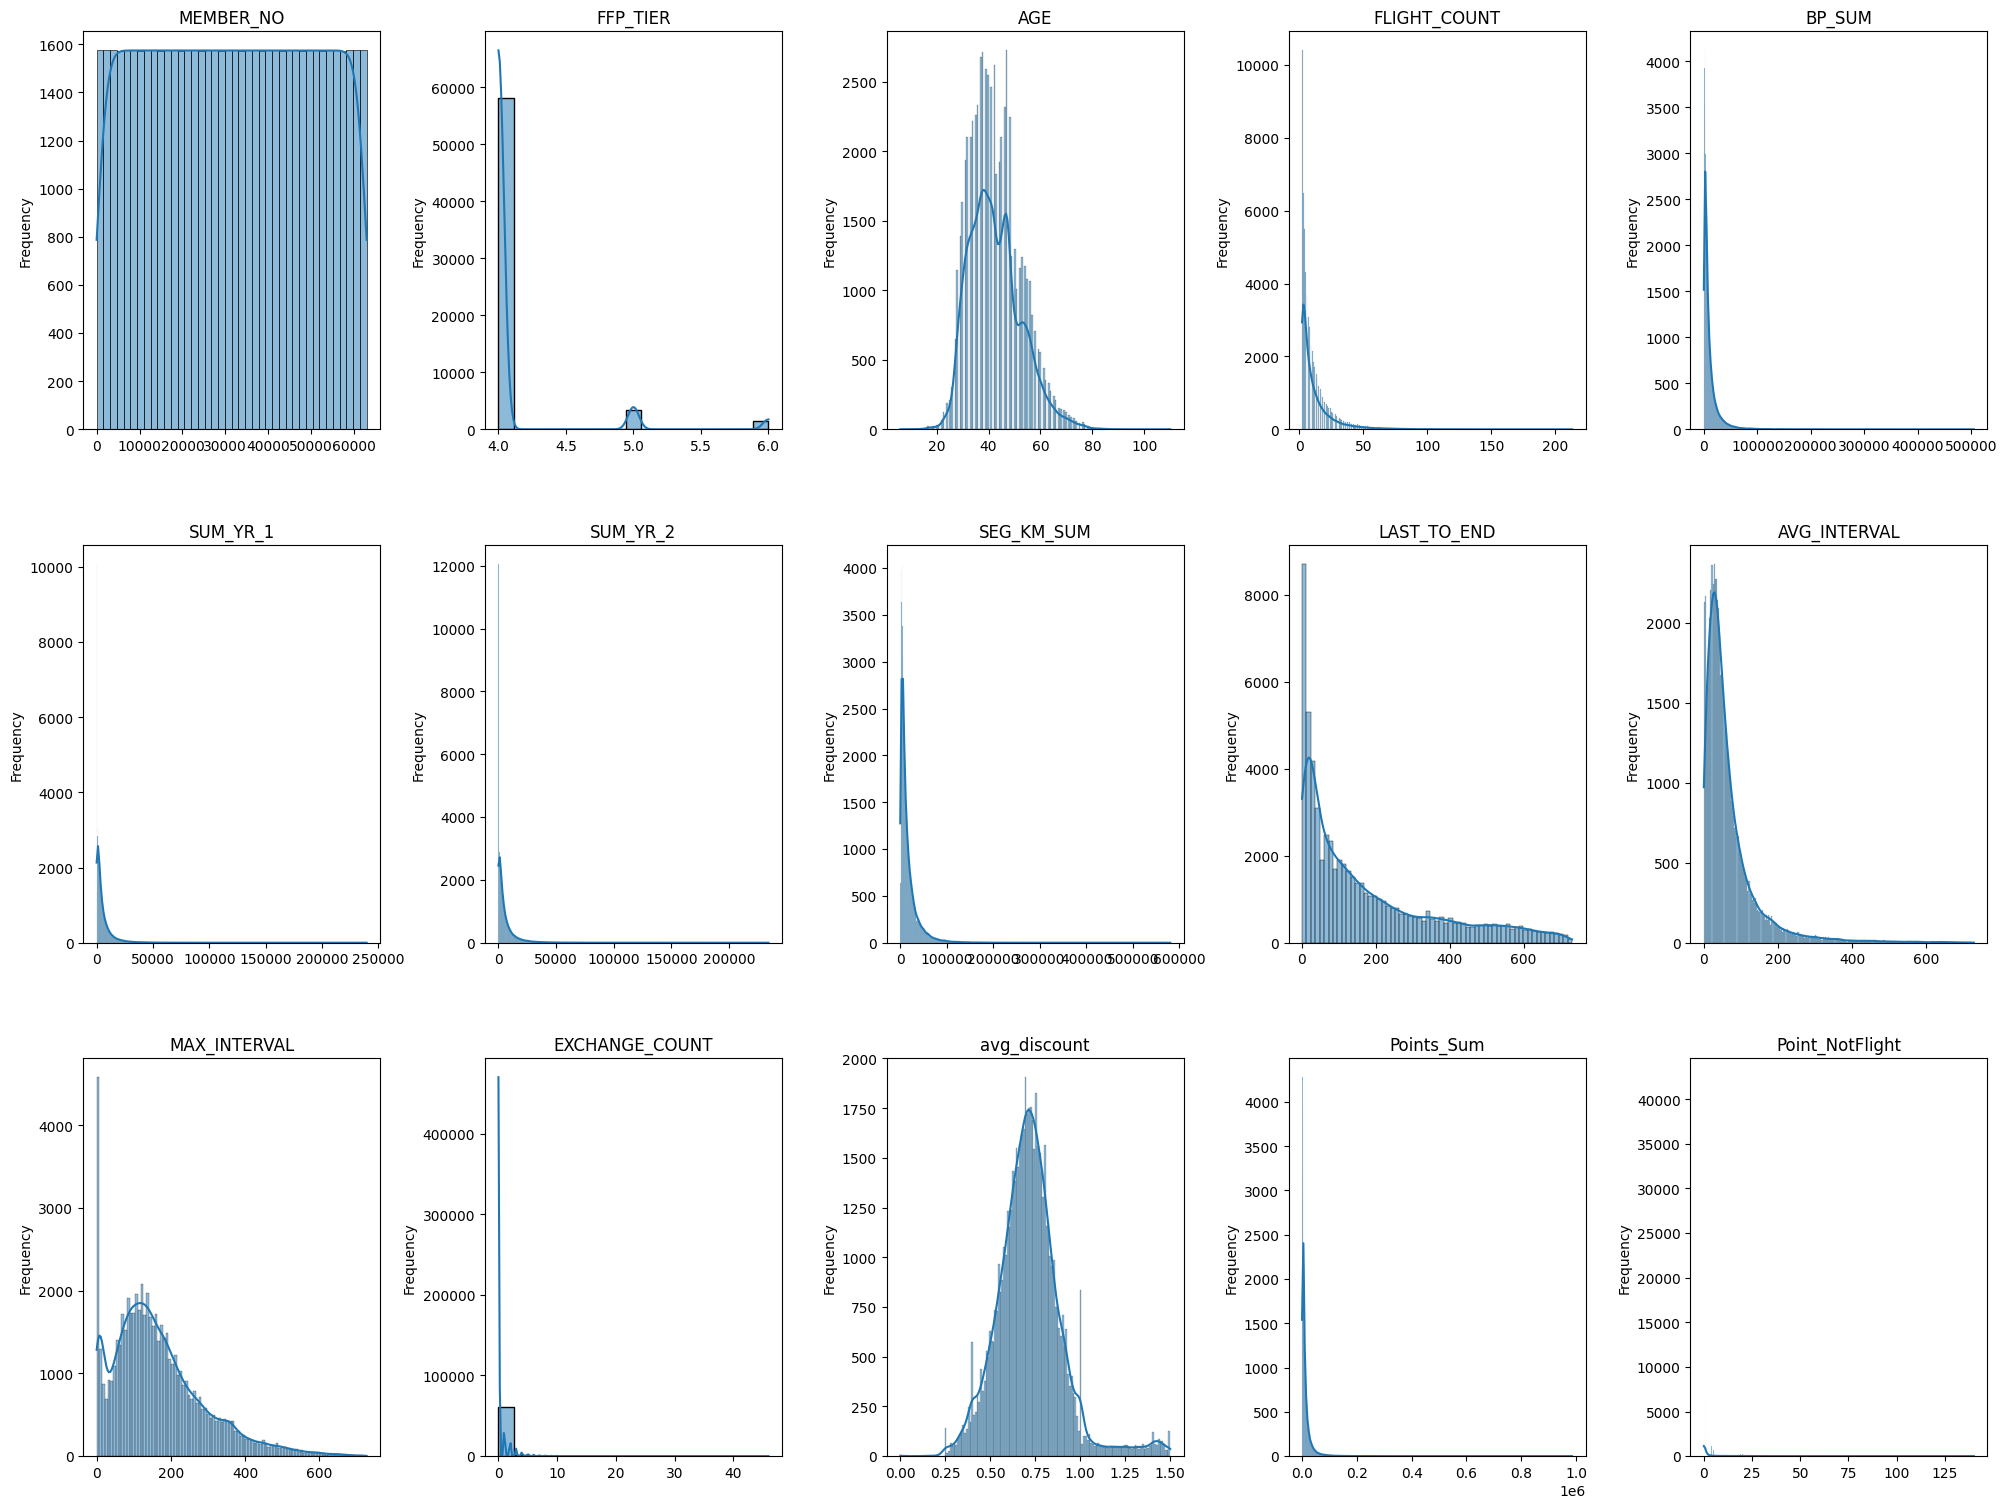

In [ ]:
# numerical plot using histogram with kde true
df_numeric = df[numeric_cols]

fig, axes = plt.subplots(3,5, figsize=(20,15))

for index, axs in enumerate(axes.flatten()):
    plot = sns.histplot(data=df_numeric, x=df_numeric.columns[index], kde=True, ax=axs)
    plot.set(xlabel='', ylabel='Frequency', title=df_numeric.columns[index])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Observations:
- The majority of columns appear to have a positive skewed distribution, except for the MEMBER_NO, FFP_TIER and avg_discount columns.

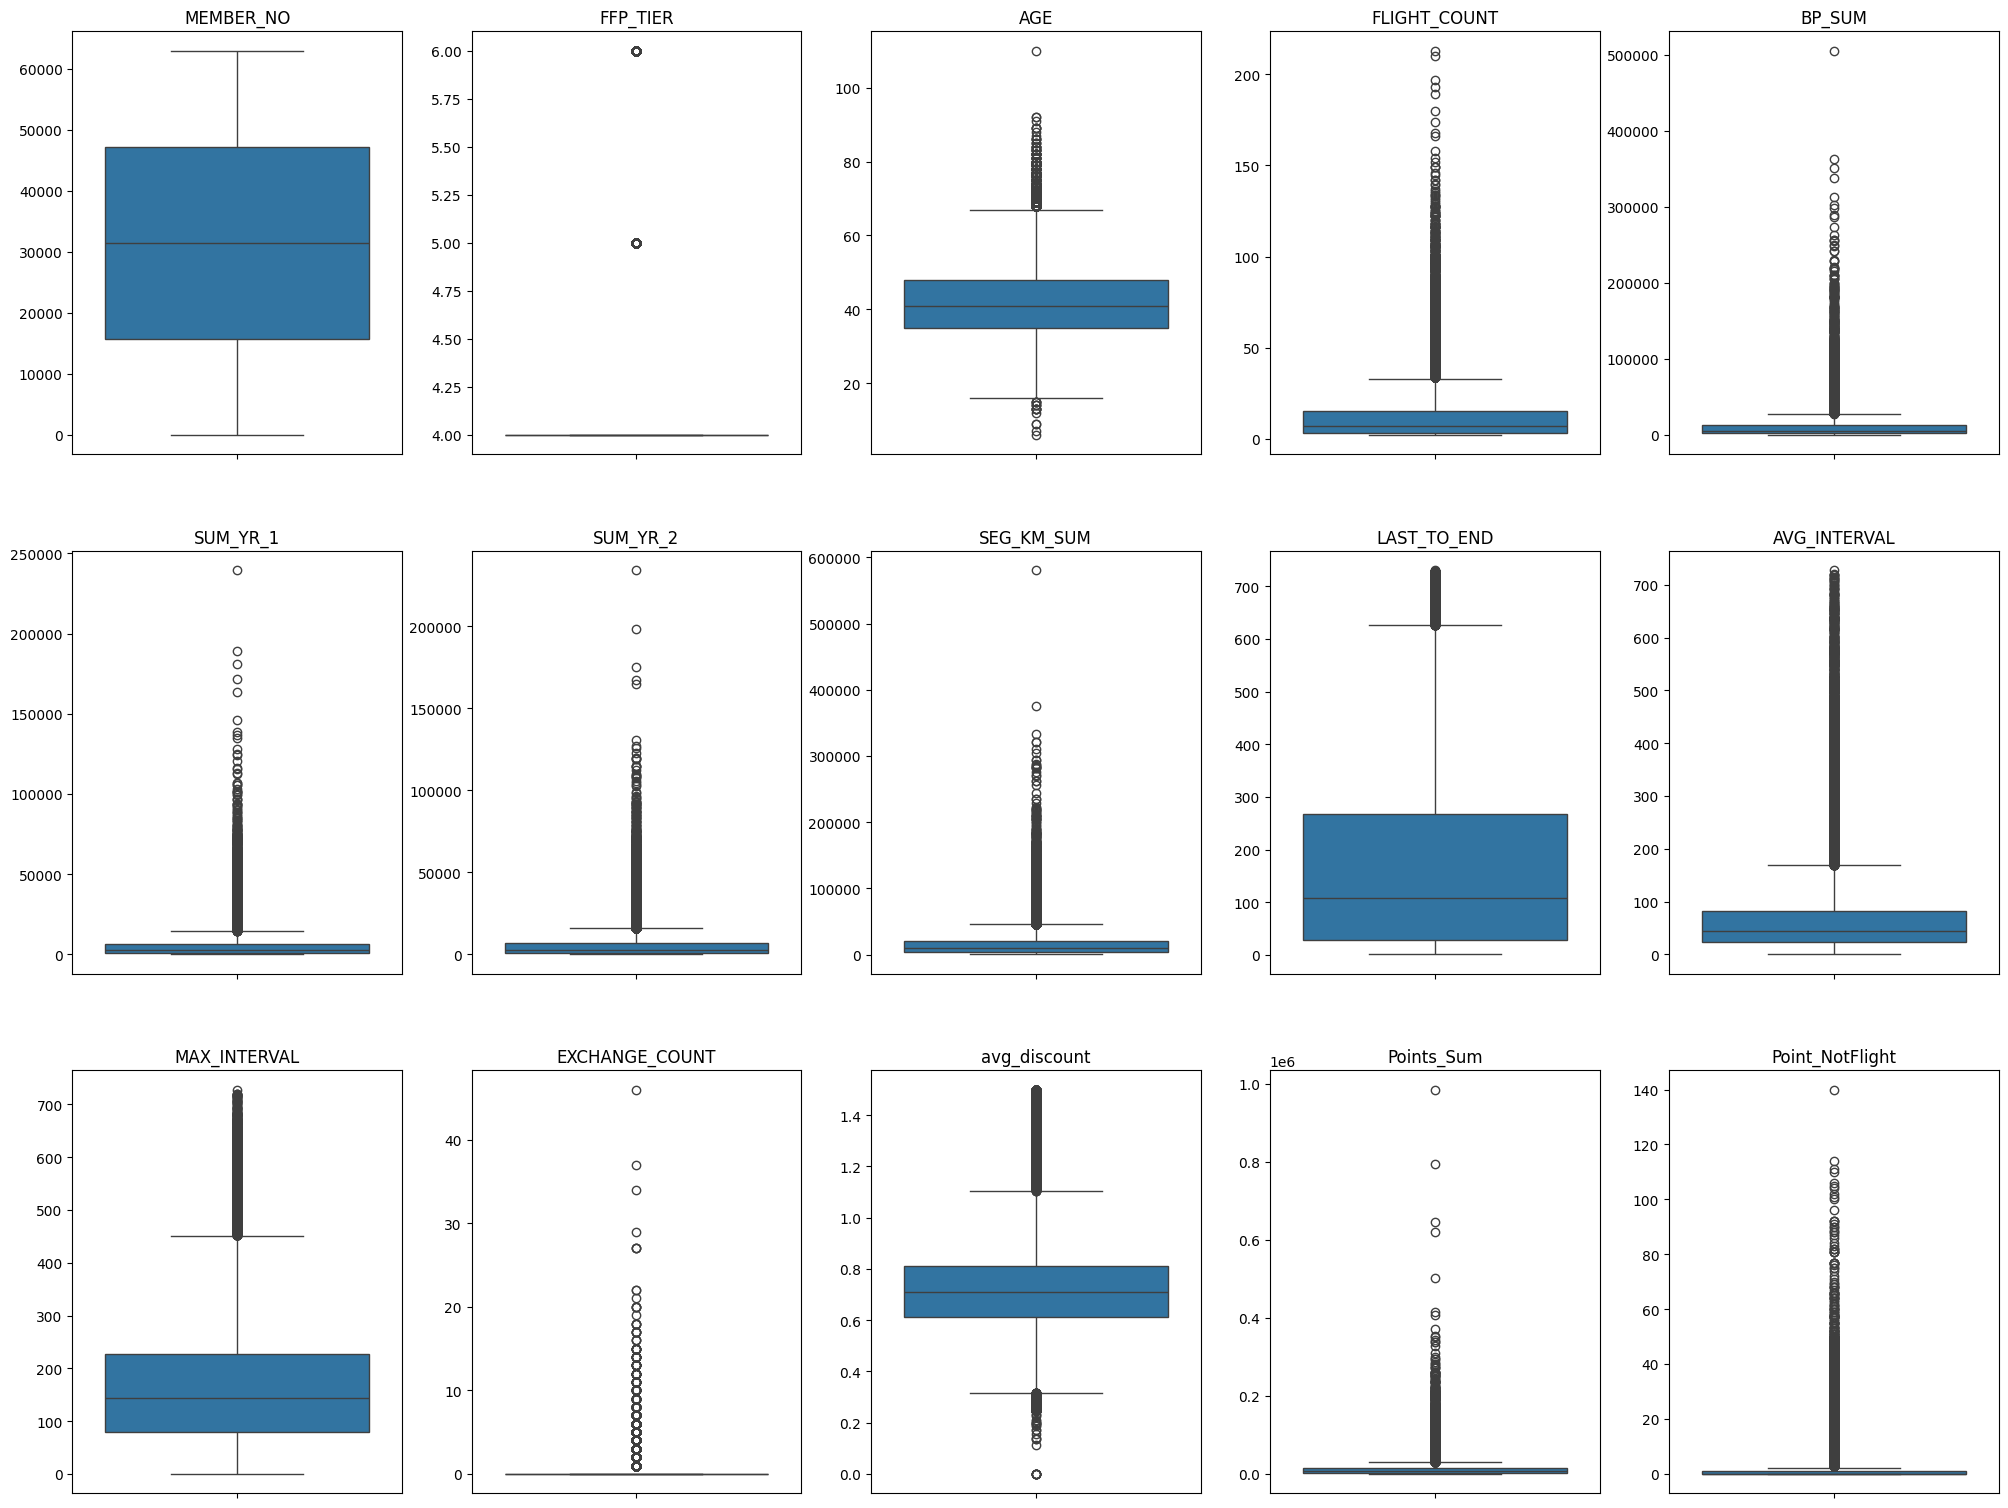

In [ ]:
# displaying an outliers using boxplot
fig, axes = plt.subplots(3,5, figsize=(20,15))

for index, axs in enumerate(axes.flatten()):
    plot = sns.boxplot(data=df_numeric, y=df_numeric.columns[index], ax=axs)
    plot.set(xlabel='', ylabel='', title=df_numeric.columns[index])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Observations:
- In the box plot, most columns show outliers, except for `MEMBER_NO` and `FFP_TIER`

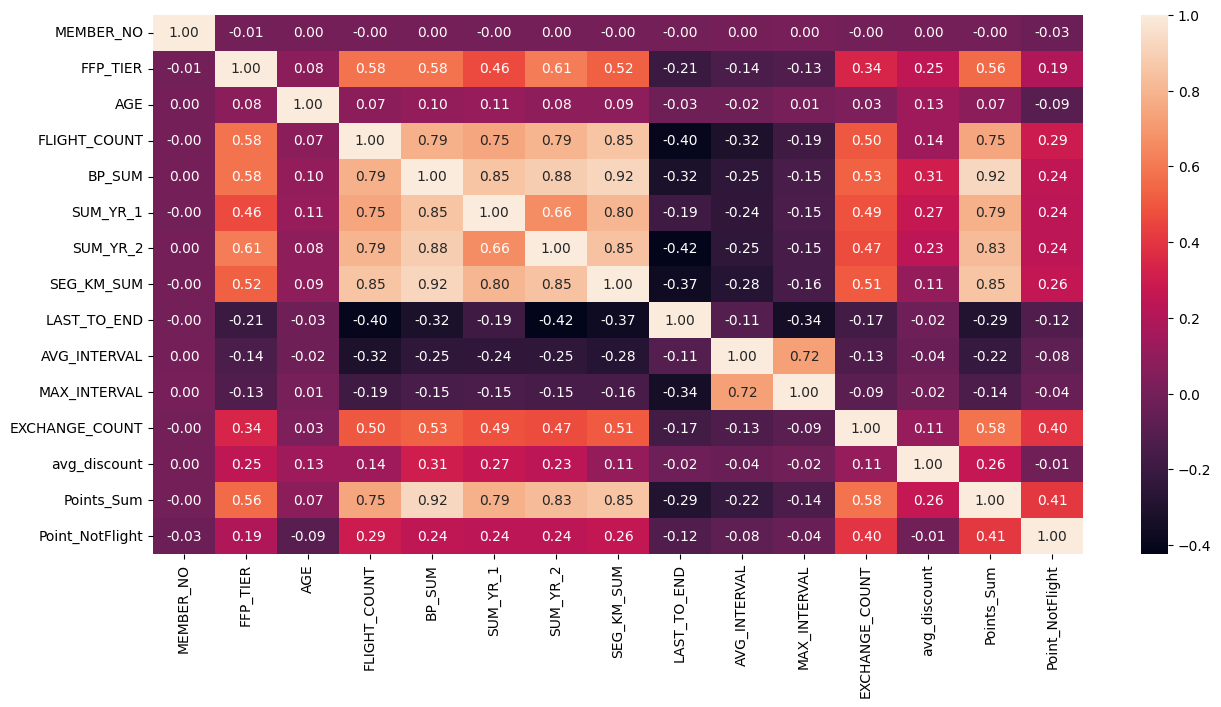

In [ ]:
# corelation between attributes using heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

Observations:
- There is a strong positive correlation between `POINTS_SUM`, `FLIGHT_COUNT`, `SEG_KM_SUM`, `SUM_YR_1`, `SUM_YR_2`, and `BP_SUM`. This suggests that as one of these variables increases, the others tend to increase as well. This could imply that customers who accumulate more points tend to fly more frequently, cover longer distances, and spend more on flights, resulting in higher point sums.

## **Data Cleaning**

Cleaning the data is the most important step that we cannot avoid. To clean this dataset, we will use several self-assumption and referencing Yang Tao in his paper.

**Contents:**

1. Missing value handling
2. Self-assumption cleaning
3. Outliers handling
4. Aviation dataset cleaning referencing Yang Tao

### **Missing Value**

In [ ]:
def missing_value(df):

    missing = []
    for columns in df.columns:
        missing_shape = df[df[columns].isna()].shape
        percentage = round(missing_shape[0]/df.shape[0] * 100, 3)

        if df[columns].dtypes != 'object':
            max, min = df[columns].max(), df[columns].min()
        else:
            max, min = '-', '-'

        missing.append({'Columns' : columns.upper(),
                        'N/A count' : missing_shape[0],
                        'Percentage' : str(percentage) + '%',
                        'Max' : max,
                        'Min' : min}
                        )
    return pd.DataFrame(missing)

missing_value(df).sort_values(by='Percentage', ascending=False)

,Columns,N/A count,Percentage,Max,Min
6,WORK_PROVINCE,3248,5.157%,-,-
5,WORK_CITY,2269,3.602%,-,-
12,SUM_YR_1,551,0.875%,239560.0,0.0
8,AGE,420,0.667%,110.0,6.0
13,SUM_YR_2,138,0.219%,234188.0,0.0
7,WORK_COUNTRY,26,0.041%,-,-
3,GENDER,3,0.005%,-,-
0,MEMBER_NO,0,0.0%,62988,1
15,LAST_FLIGHT_DATE,0,0.0%,-,-
21,POINTS_SUM,0,0.0%,985572,0


In [ ]:
total_missing = df[df.isna().any(axis=1)].shape[0]
total_missing_percentage = round(total_missing / df.shape[0] * 100,3)

print('Total missing value : {}'.format(total_missing))
print('Total missing value percentage : {}'.format(str(total_missing_percentage) + '%'))

Total missing value : 4733
Total missing value percentage : 7.514%


Observations:
- The data have 7 columns with missing value; total missing is 4733 data with 7.514 % in percentage
- The most significant contribution to missing value data are from WORK_CITY and WORK_PROVINCE, those contributes to 5.157% and 3.602% respectively. It contains NaN value and other undescriptable label like (*., ?, etc.*).
- The minimum value of ticket price, fare revenue, and average discount is 0.

### **Missing Value Handling**

In [ ]:
# drop WORK_CITY and WORK_PROVINCE first, since they're contribute hugely to missing value data
df = df.drop(['WORK_CITY', 'WORK_PROVINCE'], axis=1)

# drop all nan value
df.dropna(inplace=True)

# check missing value again
missing_value(df)

,Columns,N/A count,Percentage,Max,Min
0,MEMBER_NO,0,0.0%,62988,2
1,FFP_DATE,0,0.0%,-,-
2,FIRST_FLIGHT_DATE,0,0.0%,-,-
3,GENDER,0,0.0%,-,-
4,FFP_TIER,0,0.0%,6,4
5,WORK_COUNTRY,0,0.0%,-,-
6,AGE,0,0.0%,110.0,6.0
7,LOAD_TIME,0,0.0%,-,-
8,FLIGHT_COUNT,0,0.0%,213,2
9,BP_SUM,0,0.0%,505308,0


### **Self-Assumption Cleaning**

In [ ]:
# remove first flight data for which flight on 1905 and 2015, those are assumed to be an outliers
year = ['1905', '2015']
for y in year:
    df.drop(df[df.FIRST_FLIGHT_DATE.str.contains(y)].index, inplace=True)

# remove first flight data for month July and Sept in 2014, this removal is based on the end of observation time being 2014-03-31
df.drop(df_month_flight[(month_flight == 7) | (month_flight == 9)].index, inplace=True)

# remove last flight on 2014-02-29, since in that year, february only until 28 date
df.drop(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace=True)

## **Duplicated Check**

In [ ]:
# number of duplicated data
df.duplicated().sum()

0

### **Outliers Check**

In [ ]:
def outliers_detection(df, cleaning=False):
    outliers_list = []

    for col in df.columns:
        percentile25 = df[col].quantile(0.25)
        percentile75 = df[col].quantile(0.75)

        IQR  = percentile75 - percentile25

        upper_limit = percentile75 + 1.5*IQR
        lower_limit = percentile25 - 1.5*IQR

        outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
        percentage = round(outliers.shape[0] / df.shape[0] * 100,2)

        if cleaning == True:
            df.drop(outliers.index, inplace=True)

        outlier_dict = {'Feature' : col.upper(),
                        'Total Outliers' : outliers.shape[0],
                        'Outlier Percentage' : str(percentage) + '%'}

        outliers_list.append(outlier_dict)

    # display it using dataframe for better reading
    outlier_df = pd.DataFrame(outliers_list)

    return outlier_df, df

numeric_cols = df.select_dtypes(['float64', 'int64']).columns.tolist()
outliers, _ = outliers_detection(df[numeric_cols])
outliers

,Feature,Total Outliers,Outlier Percentage
0,MEMBER_NO,0,0.0%
1,FFP_TIER,4848,7.89%
2,AGE,984,1.6%
3,FLIGHT_COUNT,4250,6.92%
4,BP_SUM,5196,8.46%
5,SUM_YR_1,4867,7.92%
6,SUM_YR_2,5053,8.23%
7,SEG_KM_SUM,4680,7.62%
8,LAST_TO_END,1991,3.24%
9,AVG_INTERVAL,4712,7.67%


Observations:
- Almost all the features have an outliers greater than 5%. Only `Age`, `LAST_TO_END`, `MAX_INTERVAL`, and `AVG_DISCOUNT` that have an outliers below 5%.
- Several features that have an outliers above 10 % are `EXCHANGE_COUNT` and `POINT_NOTFLIGHT`
- The outliers are too much, removing all the outliers are not a good move. Let's no intefere the outliers at the moment.
- The outliers will be handled according to which features we want to keep for further processing.

### **Cleaning the data by referencing Y. Tao**

Based on the findings, there are instances where the ticket price is recorded as 0, despite there being a total flight distance greater than 0 and an average discount of 0. This inconsistency, found in a small number of rows (7), suggests anomalies. As a solution, these rows can be safely removed.

- Discard the record with empty ticket price
- Discard the record with the fare is zero
- Discard the average discount is zero and total flying kilometers are greater than zero

In [ ]:
# discard the record with empty ticket and fare revenue zero
df = df[~((df['SUM_YR_1'] == 0) & (df['SUM_YR_2'] == 0))]

# discard average discount zero and total flying km greater than zero
df = df[~((df['avg_discount'] == 0) & (df['SEG_KM_SUM'] > 0))]

In [ ]:
print('Total Row', df.shape[0], ', Total Feature', df.shape[1],'\n')

Total Row 61177 , Total Feature 21 



In [ ]:
#persentase data yang dihapus
persentase = (1-(df.shape[0]/62889))*100
print('persentase :', persentase, '%')

persentase : 2.7222566744581678 %


## **Data Transformation**

Using LRFMC methods

1. Length : length of days of customer register to observation time
2. Recency : last time the customer use the airline
3. Frequency : how frequent customer use airline
4. Monetary : how much customer spent in airline
5. Customer Cost : average space discount the customer used


- Length : LOAD_TIME - FFP_DATE
- Recency : LAST_TO_END
- Frequency : FLIGHT_COUNT
- Monetary : SEG_KM_SUM
- Customer Cost : avg_discount

For the monetary column, as an adjustment in the airline business, this feature is replaced by accumulated flight hours within a certain period of time.

In [ ]:
def RFM_Plots(df, column):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (.2, 1)})
    sns.boxplot(x=df[column], ax=ax_box)
    sns.histplot(df[column], kde=True, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

In [ ]:
load_time = pd.to_datetime(df['LOAD_TIME'])
ffp_date = pd.to_datetime(df['FFP_DATE'])

df['LENGTH'] = ((load_time - ffp_date).dt.days)

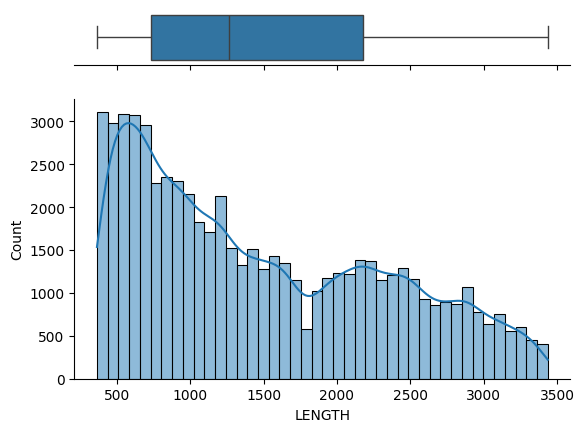

In [ ]:
RFM_Plots(df, 'LENGTH')

Observations:
- The length variable doesn't show any outliers.
- Most customers have been members for less than 1,000 days, indicating that the customer base consists mostly of new members.
- A smaller percentage of customers have longer membership durations, suggesting that there are some loyal customers who have been members for several years.
- The percentage of customers with membership durations exceeding 3,000 days is relatively small (about 5%), indicating that only a few customers have been members for more than eight years.

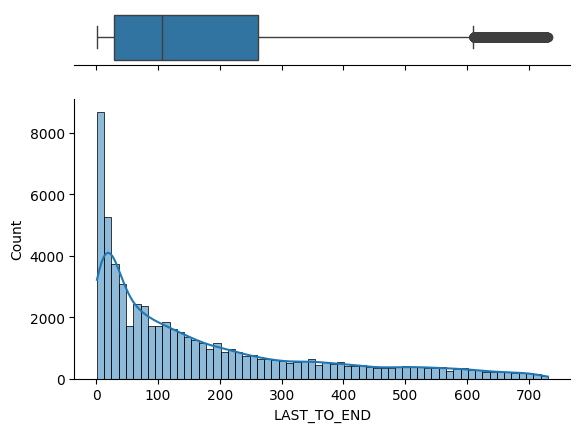

In [ ]:
RFM_Plots(df, 'LAST_TO_END')

Observations:
- Outliers are noticeable in the LAST_TO_END data.
- A positively skewed distribution indicates that many customers use the airline within a short period of time from their last usage.

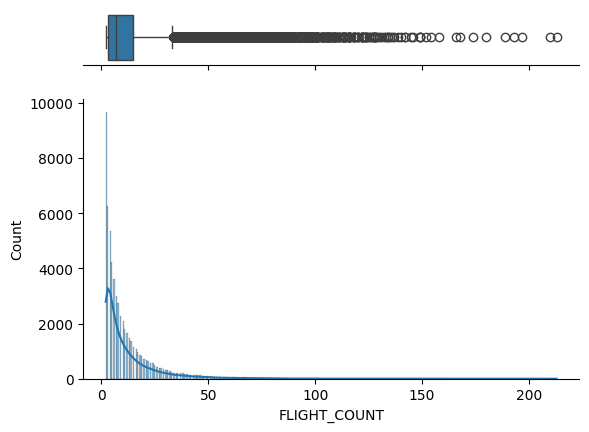

In [ ]:
RFM_Plots(df, 'FLIGHT_COUNT')

Observations:
- It appears that there are a significant number of outliers in the FLIGHT_COUNT.
- A positively skewed distribution on how frequently customers use the airline suggests that many customers use the airline infrequently, while a few customers use it very frequently.

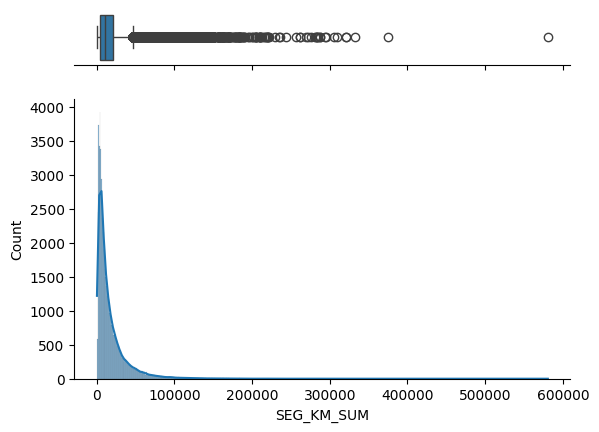

In [ ]:
RFM_Plots(df, 'SEG_KM_SUM')

Observations:
- There are many outliers in the SEG_KM_SUM.
- A positively skewed distribution of total flight hours within a certain period suggests that most customers have short flight times, while some have very long flight times. This means that the more frequently customers fly, the greater their total flight hours. A linear correlation between total flight hours and the amount of money spent indicates that the more time spent in the air, the higher the customer's spending on flights.

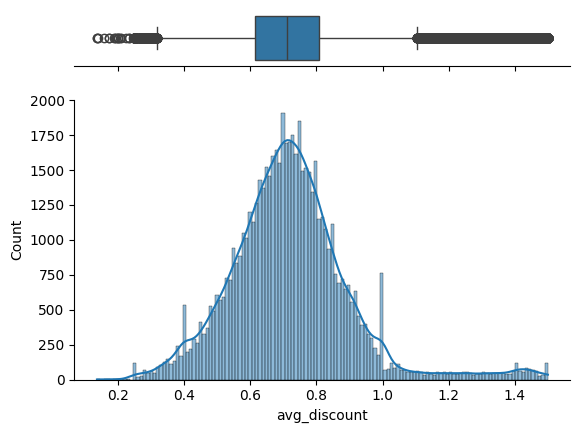

In [ ]:
RFM_Plots(df, 'avg_discount')

Observations:
-  There are many outliers in the avg_discount.
- A normal distribution of the average discount used by customers indicates that most customers consistently use discounts at a moderate level. This suggests that the pricing and promotional strategies employed by the airline are effective and efficient.

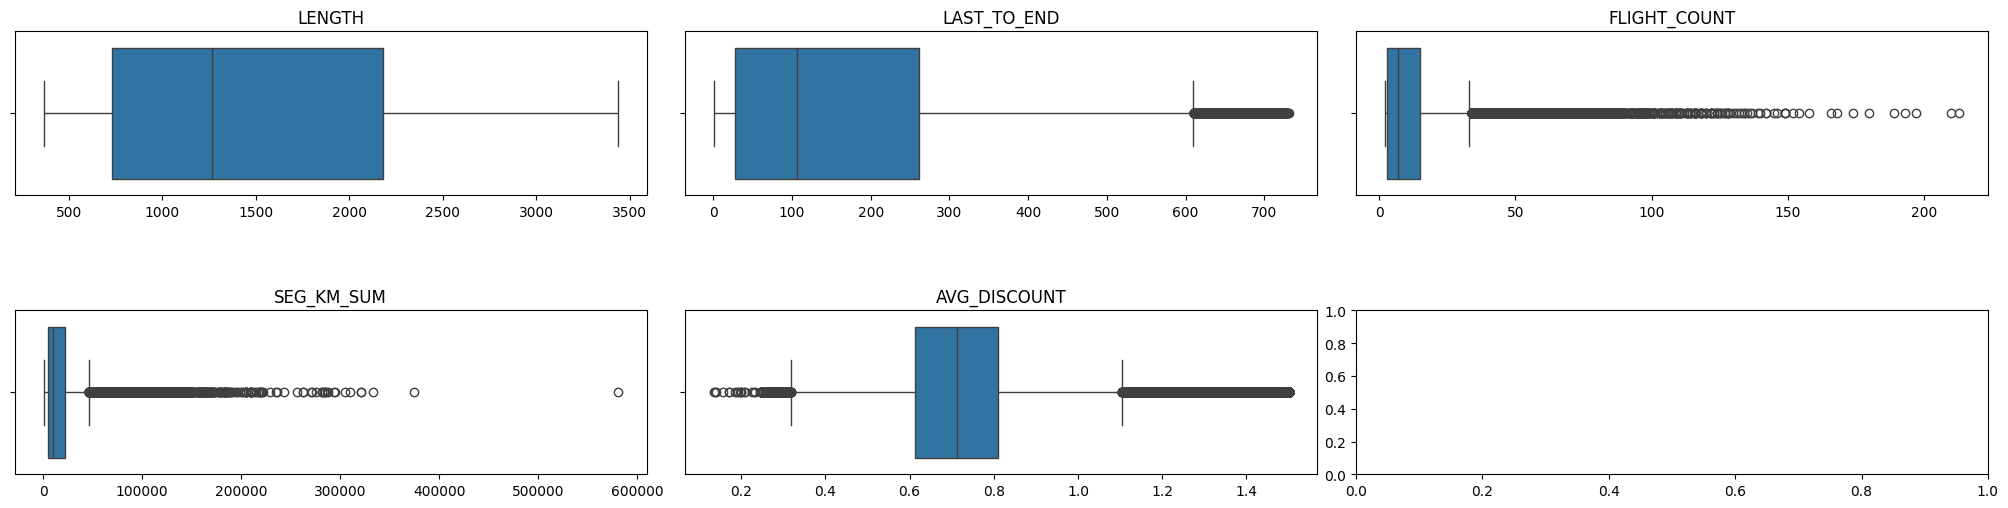

In [ ]:
rfm_columns = ['LENGTH', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']

df_rfm = df[rfm_columns]

def boxplot(df, columns):

    # displaying an outliers using boxplot
    fig, axes = plt.subplots(2,3, figsize=(20,5))

    for index, axs in enumerate(axes.flatten()[:len(columns)]):
        plot = sns.boxplot(data=df, x=df.columns[index], ax=axs)
        plot.set(xlabel='', ylabel='', title=df.columns[index].upper())

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

boxplot(df_rfm, rfm_columns)

In [ ]:
rfm_outliers, df_rfm_clean = outliers_detection(df[rfm_columns], cleaning=True)

Observations:
- All features have outliers except for LENGTH, with the largest outlier percentage observed in FLIGHT_COUNT at 8.09%. Handling these outliers is necessary before proceeding with clustering.

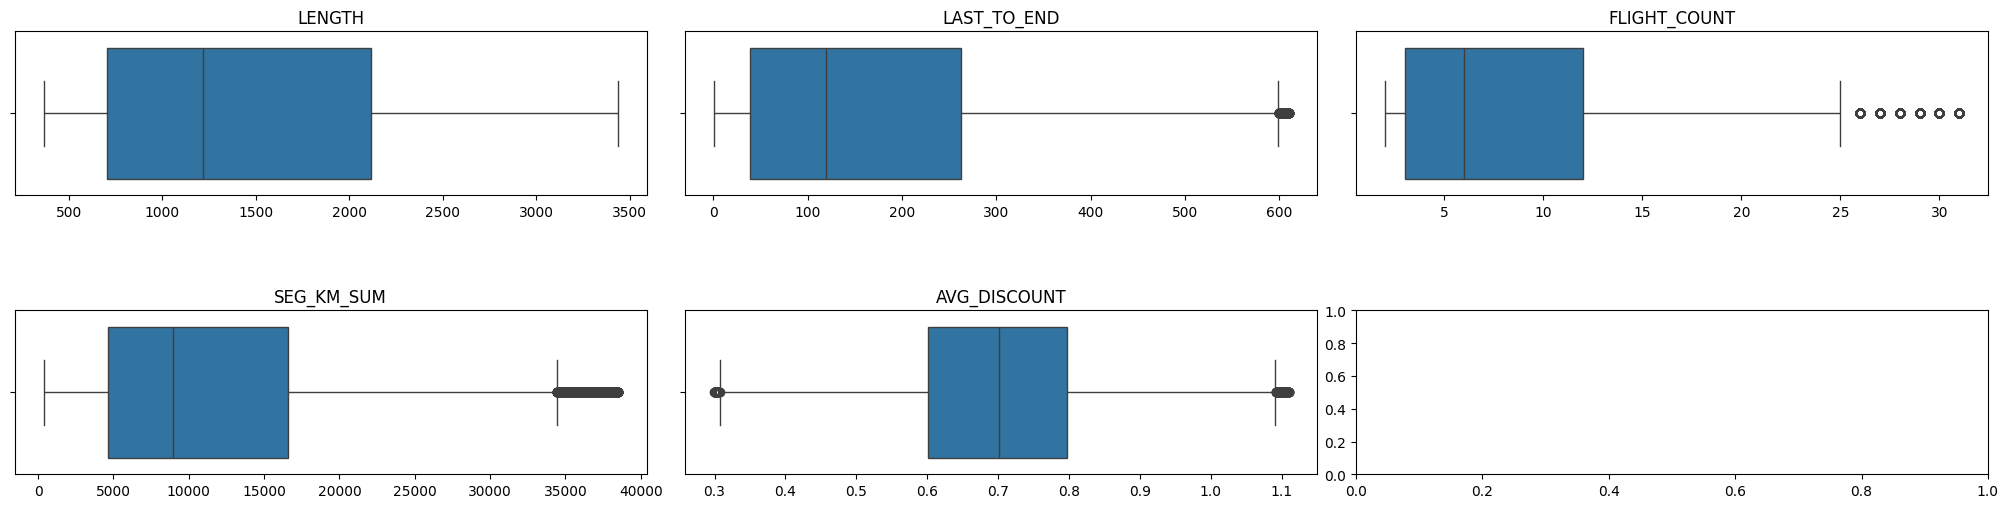

In [ ]:
boxplot(df_rfm_clean, rfm_columns)

In [ ]:
rfm_outliers, _ = outliers_detection(df_rfm_clean[rfm_columns])
rfm_outliers

,Feature,Total Outliers,Outlier Percentage
0,LENGTH,0,0.0%
1,LAST_TO_END,229,0.46%
2,FLIGHT_COUNT,1189,2.38%
3,SEG_KM_SUM,1025,2.05%
4,AVG_DISCOUNT,140,0.28%


Observations:
- After handling outliers, the percentage of outliers reduced, ranging from 0.46% to the highest at 2.38%. This indicates that we have effectively dealt with outliers and are ready to proceed to the next steps.

In [ ]:
new_columns = {'LENGTH' : 'length',
               'LAST_TO_END' : 'recency',
               'FLIGHT_COUNT' : 'frequency',
               'SEG_KM_SUM' : 'monetary',
               'avg_discount' : 'customer_cost'}

df_rfm_clean = df_rfm_clean.rename(columns=new_columns)

In [ ]:
df_rfm.head()

,LENGTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


In [ ]:
df_rfm_clean.describe()

,length,recency,frequency,monetary,customer_cost
count,49952.000000,49952.000000,49952.000000,49952.000000,49952.000000
mean,1436.463425,172.402326,8.351517,11664.072590,0.698034
std,832.881954,161.723406,6.454763,8792.371821,0.146780
min,365.000000,1.000000,2.000000,368.000000,0.299421
25%,705.000000,39.000000,3.000000,4666.750000,0.601138
50%,1218.000000,120.000000,6.000000,8980.000000,0.701450
75%,2114.000000,263.000000,12.000000,16567.500000,0.797118
max,3437.000000,610.000000,31.000000,38492.000000,1.109559


Observations:
- Observations and insights:

1. Length:
   - Customers are registered for an average of approximately 1,436 days, ranging from 365 to 3,437 days.
   - This indicates the duration of the relationship between the customer and the airline, reflecting loyalty and potential for repeat business.
   - Longer customer lifetimes suggest stronger loyalty and potential for continued revenue generation.

2. Recency:
   - On average, customers last used the airline approximately 172 days ago, with a range from 1 to 610 days.
   - This metric reflects how recently customers engaged with the airline's services.
   - Shorter recency indicates more recent engagement, which may imply active and engaged customers.

3. Frequency:
   - Customers use the airline services an average of 8.35 times, with a range from 2 to 31 times.
   - This measures the frequency of customer transactions, indicating their level of engagement and repeat business.
   - Higher frequency suggests stronger customer engagement and potentially higher customer lifetime value.

4. Monetary:
  - Customers accumulate an average of the flight kilometers within the observation window, ranging from 38492 to 368 kilometers.
  - This metric represents the total distance traveled by customers with the airline.
  - When customers accumulate more flight kilometers, it usually means they're traveling more frequently, indicating higher engagement with the airline. This likely correlates with spending more money on airline services, suggesting that customers who fly often or travel longer distances tend to spend more.

5. Customer Cost:
   - The average space discount used by customers is approximately 69.8%, ranging from 29.9% to 110.9%.
   - This metric represents the average discount rate applied to customer transactions.
   - Higher average space discounts may indicate promotions or incentives offered to customers, potentially influencing their purchasing behavior and loyalty to the airline.

<Axes: >

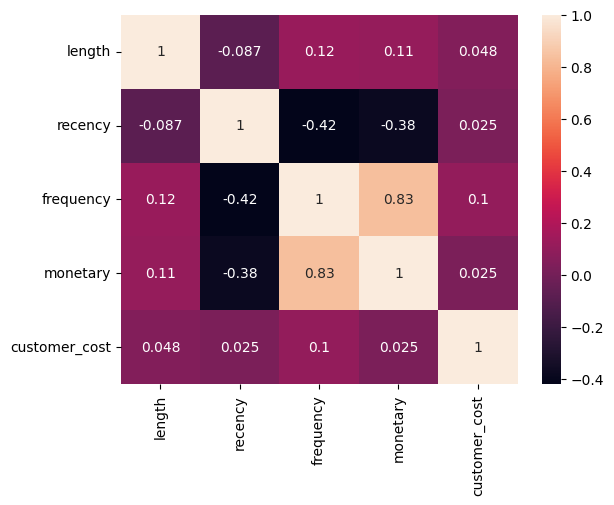

In [ ]:
# check the correlation between each feature
sns.heatmap(df_rfm_clean.corr(),cbar=True,annot=True)

Observations:
- The frequency and monetary show a strong positive correlation of 0.83. This means that the more often customers use airline services (frequency), the greater the total distance they travel, and consequently, the more money they spend (monetary). In other words, customers who fly frequently tend to generate higher revenue for the airline.

## **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_rfm_clean.astype(float))

df_scaled = pd.DataFrame(data=scaled_features, columns = df_rfm_clean.columns)

In [ ]:
df_scaled

,length,recency,frequency,monetary,customer_cost
0,1.751210,-1.047492,2.579281,2.981583,2.534471
1,-1.004310,-1.016575,2.114504,2.837594,2.594357
2,1.536291,-0.763053,0.720170,2.842370,2.549911
3,2.197856,-0.967107,2.579281,2.912773,2.414626
4,0.964776,-1.028942,2.734207,2.796876,2.529548
...,...,...,...,...,...
49947,0.606979,1.518643,-0.984015,-1.284771,0.354042
49948,-0.971892,1.481542,-0.984015,-1.284771,0.354042
49949,-1.284064,1.141452,-0.984015,-1.240187,-2.371145
49950,2.176244,-0.515715,-0.984015,-1.284771,0.081523


### **Best K**

<Axes: >

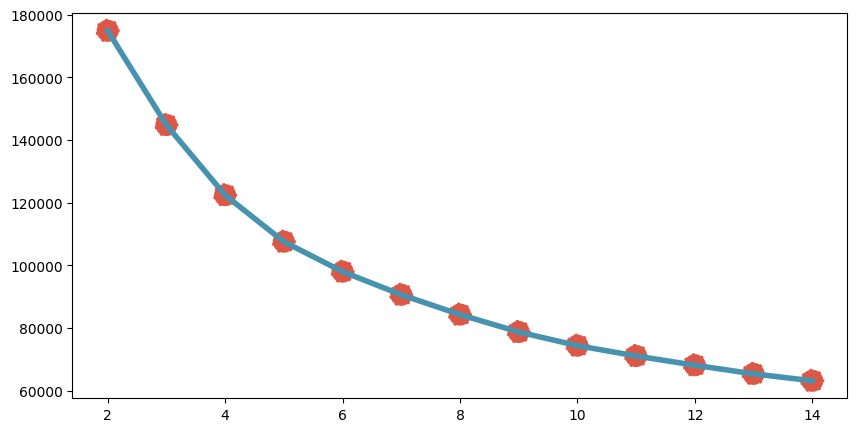

In [ ]:
from sklearn.cluster import KMeans

inertia = []
kvalues = range(2,15)

for i in kvalues:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))

sns.lineplot(x=range(2, 15), y=inertia, color='#4793AF', linewidth = 4)
sns.scatterplot(x=range(2, 15), y=inertia, s=300, color='#DD5746',  linestyle='--')

In [ ]:
from sklearn.metrics import silhouette_score

arr_silhouette_score_euclidean = []
for i in range (2,15):
    kmeans = KMeans(n_clusters=i).fit(df_scaled)
    preds = kmeans.predict(df_scaled)

    score_euclidean = silhouette_score(df_scaled, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

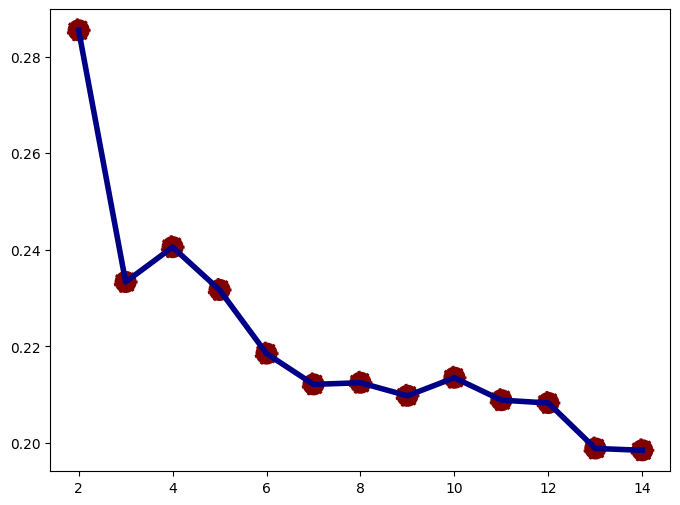

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,15), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,15), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

Observations:
- From both graphs, we can see that the best cluster choice is 4 clusters.

### **Clustering**

In [ ]:
# We use n_clusters = 4

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled.values)
df_rfm_clean['clusters'] = kmeans.labels_
df_rfm_clean.head()

,length,recency,frequency,monetary,customer_cost,clusters
3564,2895,3,25,37879,1.070041,1
3774,600,8,22,36613,1.078831,1
3813,2716,49,13,36655,1.072307,1
3833,3267,16,25,37274,1.052450,1
3919,2240,6,26,36255,1.069318,1


In [ ]:
df_rfm_clean.groupby('clusters').agg({'recency' : ['median'],
                                      'frequency' : ['mean'],
                                      'monetary' : ['mean']

})

,recency,frequency,monetary
,median,mean,mean
clusters,,,
0,97.0,6.130512,8625.579888
1,40.0,18.178578,24841.900495
2,428.0,3.853796,5771.997967
3,111.0,6.394115,9004.816945


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_scaled)
pcs = pca.transform(df_scaled)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = kmeans.labels_
data_pca

,PC 1,PC 2,clusters
0,4.369732,2.570906,1
1,3.535365,1.312550,1
2,2.956841,2.546628,1
3,4.355800,2.705262,1
4,4.218029,2.205664,1
...,...,...,...
49947,-1.960318,0.993857,2
49948,-2.198351,0.226879,2
49949,-2.251334,-2.311227,2
49950,-0.824305,1.101583,3


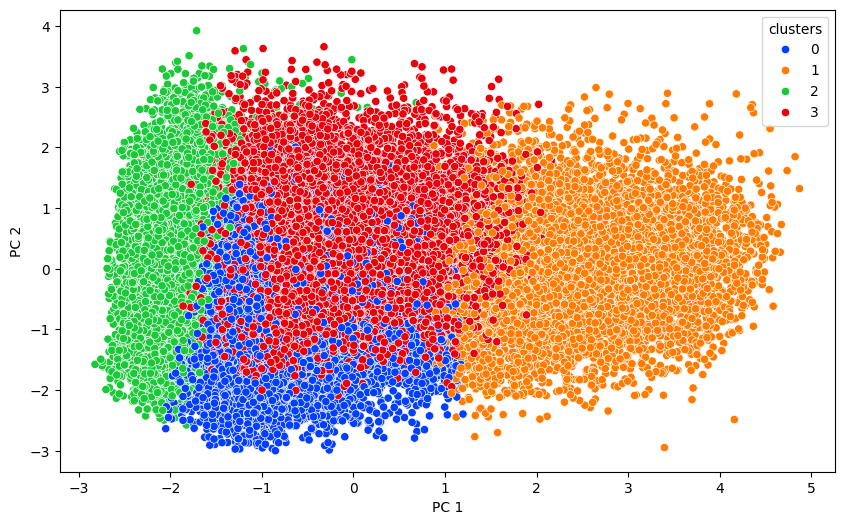

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

plot = sns.scatterplot(x="PC 1", y="PC 2", hue="clusters",
                       data=data_pca, palette = 'bright', legend='brief', ax=ax)

In [ ]:
cluster_count = df_rfm_clean['clusters'].value_counts().reset_index()
cluster_count.columns = ['clusters', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(df_scaled))*100,2)
cluster_count = cluster_count.sort_values(by=['clusters']).reset_index(drop=True)
cluster_count

,clusters,count,percentage (%)
0,0,17462,34.96
1,1,10914,21.85
2,2,10328,20.68
3,3,11248,22.52


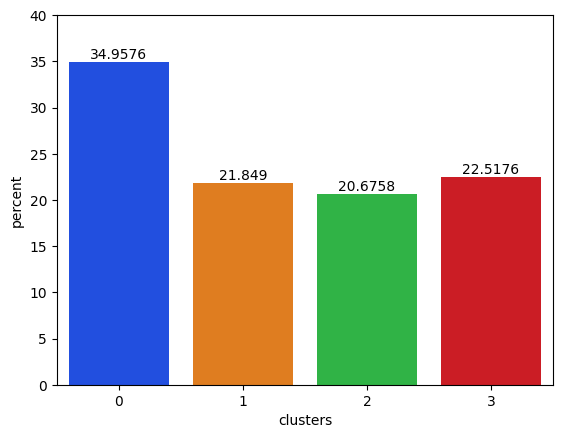

In [ ]:
ax = sns.countplot(data=data_pca, x='clusters', stat='percent', palette = 'bright')
for label in ax.containers:
    ax.bar_label(label, fontsize=10)
plt.ylim(0,40)
plt.show()

In [ ]:
display(df_rfm_clean.groupby('clusters').agg(['mean','median','min','max']))

length                         recency                   \
                 mean  median   min   max        mean median  min  max   
clusters                                                                 
0          862.311476   797.0   365  1964  110.165388   97.0    1  379   
1         1562.792010  1423.0   365  3437   68.938244   40.0    1  514   
2         1168.749806   978.0   365  3437  432.199361  428.0  192  610   
3         2451.047119  2414.0  1382  3437  130.866465  111.0    1  560   

          frequency                     monetary                        \
               mean median min max          mean   median   min    max   
clusters                                                                 
0          6.130512    6.0   2  18   8625.579888   7801.5   368  32508   
1         18.178578   17.0   3  31  24841.900495  24233.5  4048  38492   
2          3.853796    3.0   2  20   5771.997967   4515.0   368  36696   
3          6.394115    6.0   2  24   9004.816945   8195.0   368  36696   

         customer_cost                                
                  mean    median       min       max  
clusters                                              
0             0.671266  0.676615  0.299421  1.107539  
1             0.719624  0.716525  0.338710  1.109494  
2             0.713143  0.722852  0.300000  1.108769  
3             0.704768  0.707679  0.300000  1.109559

In [ ]:
lrfm_columns = df_rfm_clean.columns[:-1].tolist()

In [ ]:
def RFM_Clusters_Plots(df, columns):
    plt.figure(figsize=[len(columns)*7,5])

    i = 1
    c = ["#4793AF","#FFC470","#DD5746","#102C57","#41B06E"]
    for col in columns:

        ax = plt.subplot(1,len(columns),i)
        ax.vlines(df[col].median(), ymin=0, ymax=len(df['clusters'].unique())-1, color='grey', linestyle='--')
        g = df.groupby('clusters')

        x = g[col].median().index
        y = g[col].median().values

        ax.barh(x, y, color=c)

        plt.title(col.upper())
        i = i+1

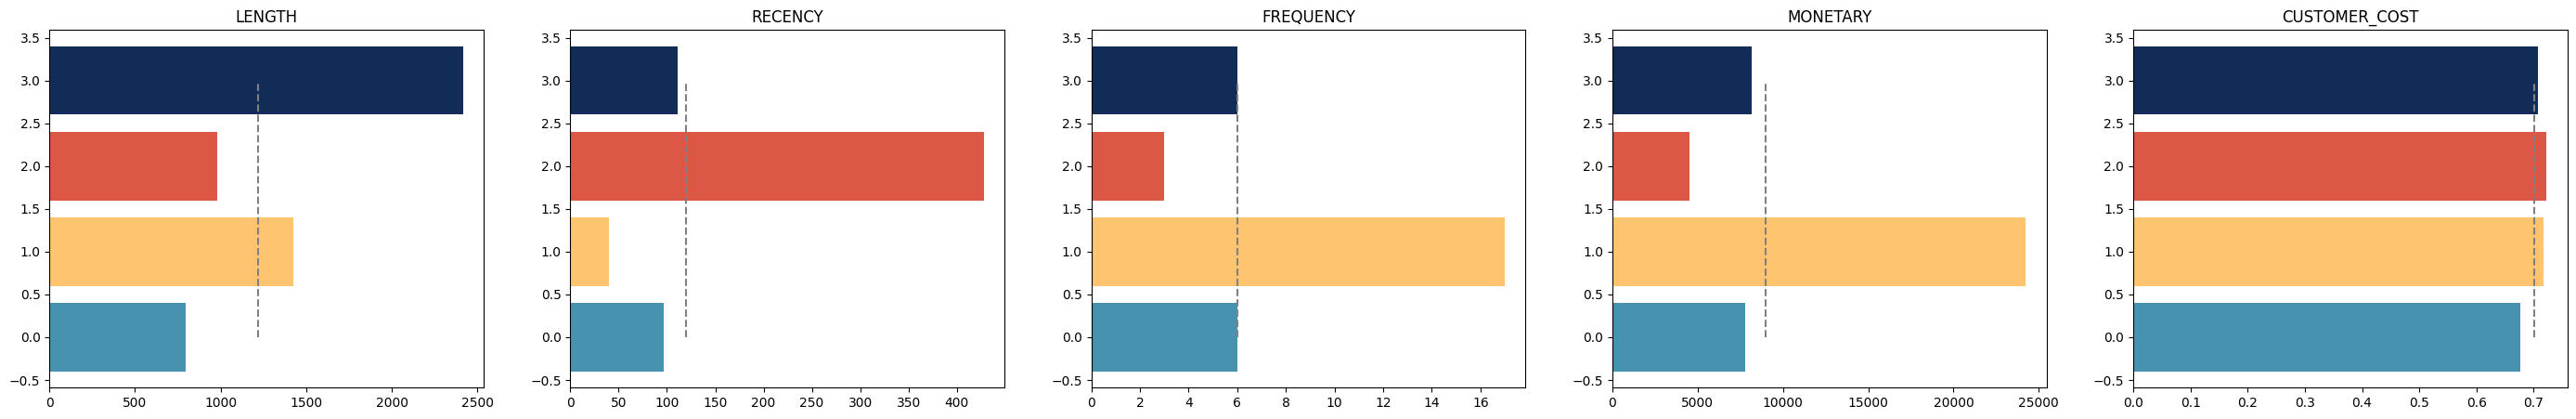

In [ ]:
RFM_Clusters_Plots(df_rfm_clean, lrfm_columns)

### **Interpretasi:**

1. **Cluster 0 - Recent User**
- This group consists of customers who are quite new to the airline, with an average membership duration of around 2 years. They tend to use the airline services every 4-5 months and typically fly about 6 times during this period. On average, they travel a total distance of approximately 8625 kilometers. Their short membership duration and relatively low recency level suggest that they have recently joined the airline. Despite being new, they show moderate flight activity and travel distance.

2. **Cluster 1 - Potential Loyalist**
- These customers have been members for an average of 7-8 years. They use the airline frequently, taking an average of 18 flights, and they travel the longest distances, up to 24841 kilometers. This group comprises customers with very high flight activity, indicating they frequently use the airline and travel long distances, which could generate significant revenue. They also show low recency, implying they book flights shortly after their last one. Additionally, these customers have been members for a significant period, showing their long-standing loyalty to the airline.

3. **Cluster 2 - Hibernating**
- These customers have been members for an average of 4-5 years. However, they don't fly much, usually only about 3 times, and they cover a moderate distance of around 5771 kilometers. These customers have been members for a moderate period, but they don't use the airline frequently. They have low flight frequency and spending, along with high recency.

4. **Cluster 3 - Loyal Customer**
- They have been members for an average of 8 years, longer than cluster 1. However, their flight frequency is lower, around 6 flights, and their total travel distance is moderate, reaching up to 9004 kilometers. This cluster consists of customers who have been members for the longest period and have moderate flight activity.

### **Business Recommendations**

1. **Cluster 0 - Recent User**
- Despite being new members, they have already shown considerable activity in using the airline. They might be occasional travelers or leisure passengers who are starting to explore air travel options. This group of new airline users needs attention to become loyal customers in the long run, and continuous monitoring is essential to prevent customers from leaving after a short time. Strategies such as providing voucher/discount codes for the next flight, awarding points for each flight, and offering rewards/discounts after reaching a certain number of flights within a specific period can be effective.

2. **Cluster 1 - Potential Loyalist**
- This group represents highly active members who have been traveling long distances for a while. They could be frequent flyers, business travelers, or individuals with extensive travel needs. They frequently use the airline and travel long distances, making them significant contributors to the company's revenue. Customers in this group should be treated well and carefully, and efforts should be made to make them feel valued to become loyal to the company. This can be achieved by providing souvenirs or merchandise, offering discounts for purchasing multiple flights at once, giving special discounts or rewards for flying with friends, and providing points/rewards for every airline booking.

3. **Cluster 2 - Hibernating**
- Although their membership tenure is moderate, these customers do not show high flight activity. They may be occasional travelers or individuals who prefer other modes of transportation for their travel needs. They are existing customers who have not recently used the airline. Efforts are needed to prompt these customers to make purchases as soon as possible, or the company risks losing trust from customers. This can be done by sending marketing emails to encourage customers in this group to fly again and providing special vouchers or discount codes for use on upcoming flights with a predetermined expiration date.

4. **Cluster 3 - Loyal Customer**
- This group represents long-standing members with moderate flight activity and travel distance. They could be regular travelers with consistent travel needs but may not fly as frequently or as far as those in Cluster 1. These customers who have been using the airline for a long time are satisfied with the services provided and do not switch to alternatives. It's important to provide treatment so that customers feel appreciated, such as sending a thank-you email for flying with us and providing voucher/discount codes for their next flights, as well as giving points/rewards for every airline booking that can be redeemed with discount vouchers or affiliate products with the airline.